# A simple introduction to Linear Regression

# Load and Preprocess Data

In [125]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [126]:
# Load dataset and print training examples in both training and testing datasets
Train_Data = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
Test_Data = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")
print("Training samples =", Train_Data.shape[0])
print("Testing samples =", Test_Data.shape[0])

Training samples = 700
Testing samples = 300


In [127]:
# Data display
Train_Data.head(5)


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
Test_Data.head(5)

In [128]:
# Handling Null values
Train_Data.fillna(0, inplace = True)
#Test_Data.isnull().sum()
Train_Data.isnull().mean()

x    0.0
y    0.0
dtype: float64

In [ ]:
# Handling duplicate values
#Train_Data.duplicated().sum()
Test_Data.duplicated().sum()

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


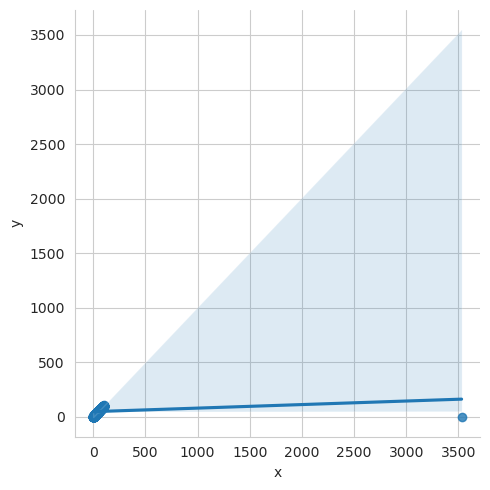

In [129]:
# Regression plot for Training data
sns.set_style('whitegrid')
sns.lmplot(x = 'x', y = 'y', data = Train_Data, sharex=False,sharey=False)

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


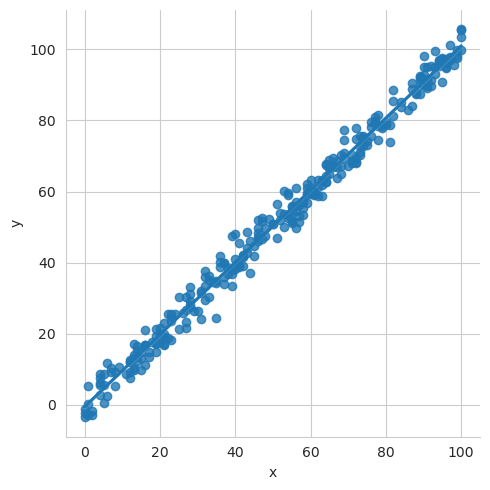

In [130]:
# Regression plot for Testing data
sns.set_style('whitegrid')
sns.lmplot(x = 'x', y = 'y', data = Test_Data, sharex=False,sharey=False)

In [131]:
# Handling outliers (only one found in training data)
Train_Data = Train_Data[Train_Data['x'] < 200]

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


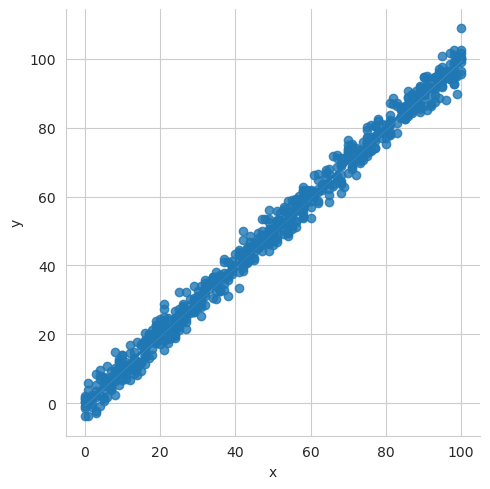

In [132]:
# Regression plot again for training data
sns.set_style('whitegrid')
sns.lmplot(x = 'x', y = 'y', data = Train_Data, sharex=False,sharey=False)

In [133]:
# Normalization
Train_Data = (Train_Data - Train_Data.min())/(Train_Data.max() - Train_Data.min())
Test_Data = (Test_Data - Test_Data.min())/(Test_Data.max() - Test_Data.min())

In [134]:
#Train_Data.head(3)
Test_Data.head(3)

,x,y
0,0.77,0.763279
1,0.21,0.244317
2,0.22,0.266617


# Why numpy and reshape(-1,1) command
The command model.fit for linear regression from sk-learn takes two arguments, (X, y).
X: a 2D Feature matrix and y a 1D regression values vector.
therefore we converted the data into numpy arrays and then used reshape(-1,1) which automatically set matrix dimensions.
For example if we have a feature matrix X in 1D with 10 examples then reshape(-1,1) command converts X to a 2D feature matrix with X.shape = (10,1)

In [136]:

X_Train = Train_Data["x"].to_numpy()
X_Train = X_Train.reshape(-1,1)

X_Test = Test_Data["x"].to_numpy()
X_Test = X_Test.reshape(-1,1)

Y_Train = Train_Data["y"].to_numpy()
Y_Test = Test_Data["y"].to_numpy()

X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((699, 1), (300, 1), (699,), (300,))

# Implement Linear Regression using Sklearn Library

In [138]:
# Load model from .linear_model from sklearn
LinearReg = LinearRegression()

In [139]:
# Train the model on training data
LinearReg.fit(X_Train, Y_Train)

LinearRegression()

In [141]:
# Evaluate model on testing data, Note: .score command drives R-squared value for regression
LinearReg.score(X_Test, Y_Test)

0.9834725922433794